In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Precipitation Analysis

In [10]:
#--Precipitation Query--#

#test
test = session.query(Measurement).first()
test.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21e3313e198>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
#Get latest Date in Database

latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date[0]


'2017-08-23'

In [12]:
#Set query_date

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [13]:
#Query Precipitation Data for desired time period, query variable: precip

precip = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= query_date).\
        order_by(Measurement.date).all()
precip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [14]:
#Convert query data into Pandas DataFrame: precip_df, drop values of NaN

precip_df = pd.DataFrame(precip)
precip_df = precip_df.dropna()
precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [15]:
#Set index to date: precip_df

#precip_df = precip_df.set_index('date')

precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


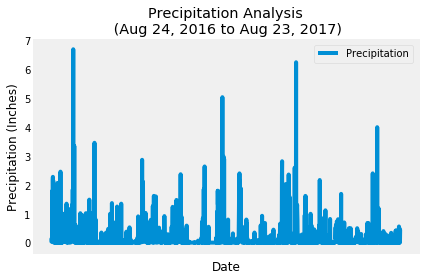

In [16]:
#reset index
#precip_df.reset_index(level=0, inplace=True)

#Plot DataFrame: precip_df

precip_df.plot('date', 'prcp')
plt.xlabel('Date')
plt.ylabel("Precipitation (Inches)")
plt.legend(["Precipitation"])
plt.title("Precipitation Analysis\n (Aug 24, 2016 to Aug 23, 2017)")
plt.tight_layout()
plt.grid(False)
plt.show()

In [17]:
#Summary Statistics of Precipitation DataFrame: precip_df

precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis


In [18]:
# Total Number of Stations in Data Set

stations_count = session.query(Measurement).group_by(Measurement.station).count()

stations_count

print(f"Station Count: {stations_count}")

Station Count: 9


In [19]:
#Find the activities of stations: stations_activity

stations_activity = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
           order_by(func.count(Measurement.tobs).desc()).all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Present the busiest station
station_busiest = stations_activity[0]
station_busiest

print(f"The busiest station is {station_busiest[0]} with {station_busiest[1]} observations.")

The busiest station is USC00519281 with 2772 observations.


In [21]:
#Give a list of the stations based upon activity level (descending order)
print("Here are all of the stations and their observations (in descending order).")

for station, observation in stations_activity:
    print(f"Station: {station}, Number of Weather Observations: {observation}")
    

Here are all of the stations and their observations (in descending order).
Station: USC00519281, Number of Weather Observations: 2772
Station: USC00519397, Number of Weather Observations: 2724
Station: USC00513117, Number of Weather Observations: 2709
Station: USC00519523, Number of Weather Observations: 2669
Station: USC00516128, Number of Weather Observations: 2612
Station: USC00514830, Number of Weather Observations: 2202
Station: USC00511918, Number of Weather Observations: 1979
Station: USC00517948, Number of Weather Observations: 1372
Station: USC00518838, Number of Weather Observations: 511


In [22]:
#Use station id to find lowest, highest, and average temperatures of the most active station

station_temp = session.query(Measurement.station, func.min(Measurement.tobs),\
               func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                .filter(Measurement.station == Station.station)\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.tobs).desc()).first()
station_temp

print(f"Station ID: {station_temp[0]},  Max Temp: {station_temp[2]}, Min Temp: {station_temp[1]}, Avg Temp: {station_temp[3]}")

Station ID: USC00519281,  Max Temp: 85.0 Min Temp: 54.0, Avg Temp: 71.66378066378067


In [23]:
#Query the last 12 months of temperature observation data for: Station USC00519281 (highest number of observations)
#Name it: query_temp

query_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
             filter(Measurement.station == station_busiest[0]).\
             filter(Measurement.date > query_date).\
             order_by(Measurement.date).all()


In [24]:
#Make query (query_temp) into a DataFrame: temp_df

temp_df = pd.DataFrame(query_temp)
temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


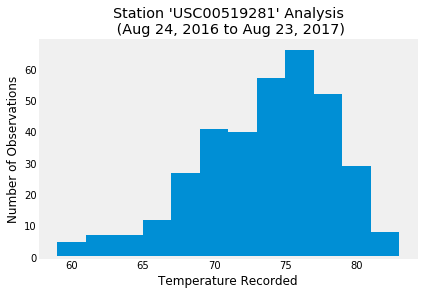

In [25]:
# Plot temperature data from temp_df as Histogram with 12 bins

plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature Recorded")
plt.ylabel("Number of Observations")
plt.title("Station 'USC00519281' Analysis\n (Aug 24, 2016 to Aug 23, 2017)")
plt.grid(False)
plt.show()

### Temperature Analysis

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_alpha = dt.date(2018,4,1)
trip_beta = dt.date(2018,4,15)
last_year = dt.timedelta(days=365)

start_date = trip_alpha - last_year
end_date = trip_beta - last_year

last_yr_avg_temp = calc_temps(start_date, end_date)

last_yr_avg_temp

[(67.0, 74.47368421052632, 82.0)]

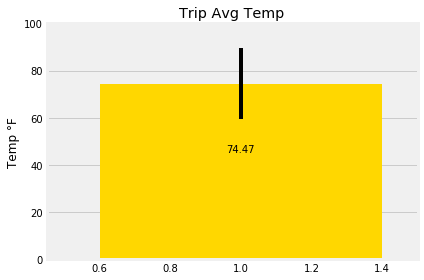

In [42]:
#--Plot data as bar plot--#

#Find Temperature Calculations
max_temp = last_yr_avg_temp[0][2]
avg_temp = last_yr_avg_temp[0][1]
min_temp = last_yr_avg_temp[0][0]

#Make the plot

fig, ax = plt.subplots()
bar_chart = ax.bar(1, avg_temp, color = 'gold', yerr = (max_temp - min_temp))
ax.set_ylabel("Temp °F")
ax.set_title("Trip Avg Temp")



def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h, "%.2f" % float(h), ha="center", va="bottom", fontsize=10)
        
#Complete labels
autolabels(bar_chart)
plt.ylim(0,100)
plt.xlim(0.45,1.5)
fig.tight_layout()
ax.xaxis.grid(False)
plt.show()

## Optional Challenge Assignment

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation




In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

### Daily Rainfall Average

In [43]:
#initialize empty list: normals
normals = []

In [49]:
#Find average normals data from database, use daily_normals function, within the specified start and end dates

#session.query()



'04-01'

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
